In [23]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
import wittgenstein as lw
from sklearn import tree
import warnings
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import datetime as dt


In [24]:
#Read CSV file into data frame
NoShow_Initialdata=pd.read_csv('C:/Users/kanka/OneDrive/Desktop/Fall 2019/ML/Project/noshowappointments/NoShowDataset.csv',delimiter=',')

In [25]:
#NoShow_Initialdata.dtypes
#print(NoShow_Initialdata)
print('The initial distribution of target values counts in No-show target column')
print(NoShow_Initialdata['No-show'].value_counts())




The initial distribution of target values counts in No-show target column
No     88208
Yes    22319
Name: No-show, dtype: int64


In [26]:
#calculating the number of days from the scheduled time to actual appointment time
NoShow_Initialdata['ScheduledDay']=pd.to_datetime(NoShow_Initialdata['ScheduledDay'])
NoShow_Initialdata['AppointmentDay']=pd.to_datetime(NoShow_Initialdata['AppointmentDay'])
NoShow_Initialdata['NumberOfDays']=(NoShow_Initialdata['AppointmentDay']-NoShow_Initialdata['ScheduledDay']).dt.days
NoShow_Finaldata=NoShow_Initialdata.drop(['ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1)

#checking that number of days is not in negatives
NoShow_Finaldata=NoShow_Finaldata[(NoShow_Finaldata['NumberOfDays']) > -1]

#Checking age is not less than zero
NoShow_Finaldata=NoShow_Finaldata[(NoShow_Finaldata['Age']) > 0]
print(NoShow_Finaldata)
print(NoShow_Finaldata['No-show'].value_counts())

           PatientId  AppointmentID Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772      F   76            0             1   
6       7.336880e+14        5630279      F   23            0             0   
7       3.449830e+12        5630575      F   39            0             0   
9       7.812460e+13        5629123      F   19            0             0   
10      7.345360e+14        5630213      F   30            0             0   
11      7.542950e+12        5620163      M   29            0             0   
12      5.666550e+14        5634718      F   22            1             0   
13      9.113950e+14        5636249      M   28            0             0   
14      9.988470e+13        5633951      F   54            0             0   
15      9.994839e+10        5620206      F   15            0             0   
16      8.457440e+13        5633121      M   50            0             0   
17      1.479500e+13        5633460      F   40            1    

In [27]:
encode_category=LabelEncoder()

In [28]:
NoShow_Finaldata['Gender']=encode_category.fit_transform(NoShow_Finaldata['Gender'])

NoShow_Finaldata.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,NumberOfDays
5,9.598510e+13,5626772,0,76,0,1,0,0,0,0,No,1
6,7.336880e+14,5630279,0,23,0,0,0,0,0,0,Yes,1
7,3.449830e+12,5630575,0,39,0,0,0,0,0,0,Yes,1
9,7.812460e+13,5629123,0,19,0,0,0,0,0,0,No,1
10,7.345360e+14,5630213,0,30,0,0,0,0,0,0,No,1


In [29]:
y = NoShow_Finaldata['No-show']
x = NoShow_Finaldata.drop('No-show', axis=1)
print(x)

           PatientId  AppointmentID  Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772       0   76            0             1   
6       7.336880e+14        5630279       0   23            0             0   
7       3.449830e+12        5630575       0   39            0             0   
9       7.812460e+13        5629123       0   19            0             0   
10      7.345360e+14        5630213       0   30            0             0   
11      7.542950e+12        5620163       1   29            0             0   
12      5.666550e+14        5634718       0   22            1             0   
13      9.113950e+14        5636249       1   28            0             0   
14      9.988470e+13        5633951       0   54            0             0   
15      9.994839e+10        5620206       0   15            0             0   
16      8.457440e+13        5633121       1   50            0             0   
17      1.479500e+13        5633460       0   40    

[0.2948862  0.31068207 0.01584216 0.19716711 0.00564554 0.00854884
 0.00730436 0.0056074  0.00549703 0.00882533 0.13999396]


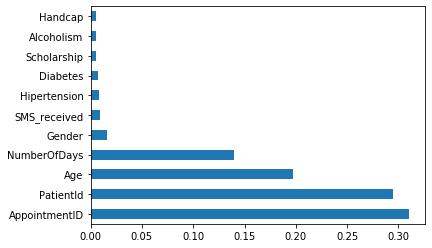

In [30]:
warnings.filterwarnings("ignore")
#Feature selection based on it's importance
model =  RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [31]:
#Recursive Feature Selection wrapper method

from sklearn.feature_selection import RFE

warnings.filterwarnings("ignore")
Random_model =  RandomForestClassifier()
rfe = RFE(Random_model, 10)
rfe_object = rfe.fit_transform(x,y)

Random_model.fit(x,y)              
temp = pd.Series(rfe.support_,index=x.columns)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)
print(rfe.support_)
print(rfe.ranking_)

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Handcap', 'SMS_received', 'NumberOfDays'],
      dtype='object')
[ True  True  True  True  True  True  True False  True  True  True]
[1 1 1 1 1 1 1 2 1 1 1]


In [32]:
x = NoShow_Finaldata.drop(['Alcoholism','No-show'],axis=1)
y = NoShow_Finaldata['No-show']

print(x)

           PatientId  AppointmentID  Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772       0   76            0             1   
6       7.336880e+14        5630279       0   23            0             0   
7       3.449830e+12        5630575       0   39            0             0   
9       7.812460e+13        5629123       0   19            0             0   
10      7.345360e+14        5630213       0   30            0             0   
11      7.542950e+12        5620163       1   29            0             0   
12      5.666550e+14        5634718       0   22            1             0   
13      9.113950e+14        5636249       1   28            0             0   
14      9.988470e+13        5633951       0   54            0             0   
15      9.994839e+10        5620206       0   15            0             0   
16      8.457440e+13        5633121       1   50            0             0   
17      1.479500e+13        5633460       0   40    

In [33]:
sm = SMOTE()

#Initial number of 'Yes' and 'No'
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Initial count of distribution of outcome")
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)


#Applied smote alogorithm
x, y = sm.fit_sample(x, y)

#values after smote algorithm
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Smote distribution outcome")
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)


# split the training and test data

x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.3)




Initial count of distribution of outcome
Unique Values :  ['No' 'Yes']
Occurrence Count :  [49894 19934]
Smote distribution outcome
Unique Values :  ['No' 'Yes']
Occurrence Count :  [49894 49894]


KNN accuracy on Test Data :  0.6214049503958312
Confusion matrix of Test Data
[[8978 6068]
 [5266 9625]]
              precision    recall  f1-score   support

          No       0.63      0.60      0.61     15046
         Yes       0.61      0.65      0.63     14891

    accuracy                           0.62     29937
   macro avg       0.62      0.62      0.62     29937
weighted avg       0.62      0.62      0.62     29937

KNN accuracy on Train Data :  0.7551359321985369
Confusion matrix of Train Data
[[25769  9079]
 [ 8025 26978]]
              precision    recall  f1-score   support

          No       0.76      0.74      0.75     34848
         Yes       0.75      0.77      0.76     35003

    accuracy                           0.76     69851
   macro avg       0.76      0.76      0.76     69851
weighted avg       0.76      0.76      0.76     69851

AUC value for KNN test data
0.6631465109754571


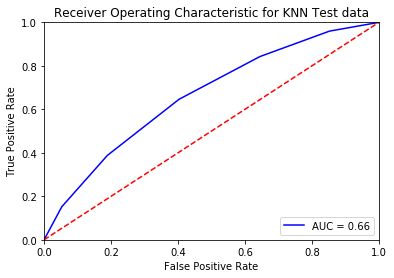

AUC value for KNN train data
0.8386664387018172


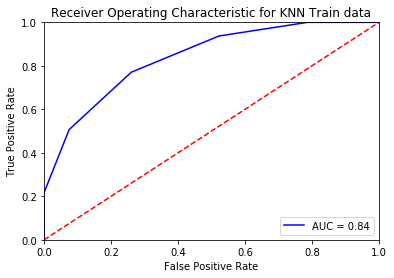

In [34]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_Train, y_Train)
#predict using the testing data
pred=neigh.predict(x_Test)
print("KNN accuracy on Test Data : ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of Test Data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))

pred_Train=neigh.predict(x_Train)
print("KNN accuracy on Train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of Train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))


# calcualte probabilty for each test instance
probs = neigh.predict_proba(x_Test)
preds = probs[:,1]
# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for KNN test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for KNN Test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

probs = neigh.predict_proba(x_Train)
preds_Train = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Train,preds_Train,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for KNN train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for KNN Train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Naive-Bayes accuracy on test data :  0.5013528409660286
Confusion matrix for test data
[[12125  2921]
 [12007  2884]]
              precision    recall  f1-score   support

          No       0.50      0.81      0.62     15046
         Yes       0.50      0.19      0.28     14891

    accuracy                           0.50     29937
   macro avg       0.50      0.50      0.45     29937
weighted avg       0.50      0.50      0.45     29937

Navie-Bayes accuracy on train Data :  0.5031424031152023
Confusion matrix of train Data
[[28234  6614]
 [28092  6911]]
              precision    recall  f1-score   support

          No       0.50      0.81      0.62     34848
         Yes       0.51      0.20      0.28     35003

    accuracy                           0.50     69851
   macro avg       0.51      0.50      0.45     69851
weighted avg       0.51      0.50      0.45     69851

AUC value for Navie-Bayes test data
0.49992718365981065


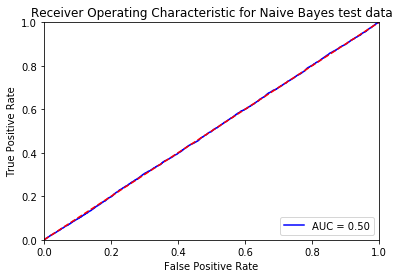

AUC value for Navie-Bayes train data
0.5046859390276058


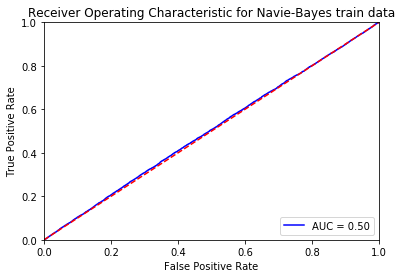

In [35]:
# Naves bayes algorithm
gnb = GaussianNB()
#train the algorithm on training data 
gnb.fit(x_Train, y_Train)
#predict using the testing data
pred=gnb.predict(x_Test)
print("Naive-Bayes accuracy on test data : ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for Navies-Bayes
print("Confusion matrix for test data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))


pred_Train=gnb.predict(x_Train)
print("Navie-Bayes accuracy on train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))


# calcualte probabilty for each test instance
probs = gnb.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for Navie-Bayes test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Naive Bayes test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = gnb.predict_proba(x_Train)
preds_Train = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Train,preds_Train,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for Navie-Bayes train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Navie-Bayes train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


LinearLogisticModel accuracy on test data :  0.49741123025019207
Confusion matrix for test data
[[    0 15046]
 [    0 14891]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00     15046
         Yes       0.50      1.00      0.66     14891

    accuracy                           0.50     29937
   macro avg       0.25      0.50      0.33     29937
weighted avg       0.25      0.50      0.33     29937

LinearLogisticModel accuracy on train Data :  0.5011095045167571
Confusion matrix of train Data
[[    0 34848]
 [    0 35003]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00     34848
         Yes       0.50      1.00      0.67     35003

    accuracy                           0.50     69851
   macro avg       0.25      0.50      0.33     69851
weighted avg       0.25      0.50      0.33     69851

AUC value for LinearLogisticModel test data
0.4999273733496239


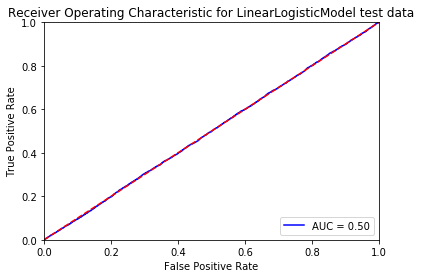

AUC value for LinearLogisticModel train data
0.504685966081564


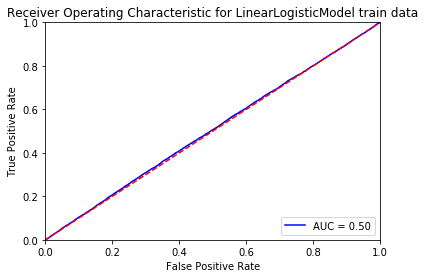

In [36]:
from sklearn.linear_model import LogisticRegression

#Linear Regression algorithm
LinearLogisticModel = LogisticRegression()
LinearLogisticModel.fit(x_Train, y_Train)
#train the algorithm on training data 

#predict using the testing data
pred=LinearLogisticModel.predict(x_Test)
print("LinearLogisticModel accuracy on test data : ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for Navies-Bayes
print("Confusion matrix for test data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))


pred_Train=LinearLogisticModel.predict(x_Train)
print("LinearLogisticModel accuracy on train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))


# calcualte probabilty for each test instance
probs = LinearLogisticModel.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for LinearLogisticModel test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for LinearLogisticModel test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = LinearLogisticModel.predict_proba(x_Train)
preds_Train = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Train,preds_Train,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for LinearLogisticModel train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for LinearLogisticModel train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Decision Tree accuracy on test data :  0.7154023449243411
Confusion matrix on test data
[[14532   514]
 [ 8006  6885]]
              precision    recall  f1-score   support

          No       0.64      0.97      0.77     15046
         Yes       0.93      0.46      0.62     14891

    accuracy                           0.72     29937
   macro avg       0.79      0.71      0.70     29937
weighted avg       0.79      0.72      0.70     29937

Decision Tree accuracy on train Data :  0.5031424031152023
Confusion matrix of train Data
[[28234  6614]
 [28092  6911]]
              precision    recall  f1-score   support

          No       0.50      0.81      0.62     34848
         Yes       0.51      0.20      0.28     35003

    accuracy                           0.50     69851
   macro avg       0.51      0.50      0.45     69851
weighted avg       0.51      0.50      0.45     69851

AUC value for Decision tree train data
0.7799139719651665


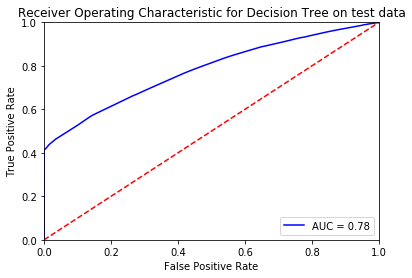

AUC value for Decision tree train data
0.7855103331265034


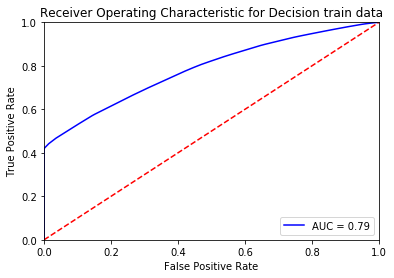

In [37]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=7)

decision_tree.fit(x_Train, y_Train)
#predict using the testing data
pred=decision_tree.predict(x_Test)
print("Decision Tree accuracy on test data : ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for decision tree
print("Confusion matrix on test data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))

pred_Train=gnb.predict(x_Train)
print("Decision Tree accuracy on train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))


# calcualte probabilty for each test instance
probs = decision_tree.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for Decision tree train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Decision Tree on test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = decision_tree.predict_proba(x_Train)
preds_Train = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Train,preds_Train,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for Decision tree train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Decision train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


RandomForest classifier accuracy for test data :  0.7613321308080302
Confusion matrix for random forest classifier test data
[[13089  1957]
 [ 5188  9703]]
              precision    recall  f1-score   support

          No       0.72      0.87      0.79     15046
         Yes       0.83      0.65      0.73     14891

    accuracy                           0.76     29937
   macro avg       0.77      0.76      0.76     29937
weighted avg       0.77      0.76      0.76     29937

RandomForest classifier accuracy on train Data :  0.5031424031152023
Confusion matrix of RandomForest classifier train Data
[[28234  6614]
 [28092  6911]]
              precision    recall  f1-score   support

          No       0.50      0.81      0.62     34848
         Yes       0.51      0.20      0.28     35003

    accuracy                           0.50     69851
   macro avg       0.51      0.50      0.45     69851
weighted avg       0.51      0.50      0.45     69851

AUC value for RandomForest classifi

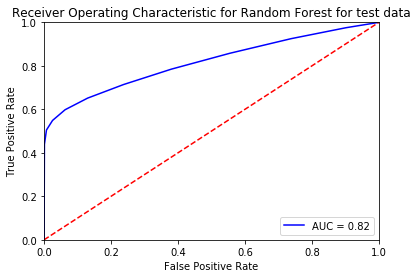

AUC value for RandomForest classifier train data
0.9994157160758383


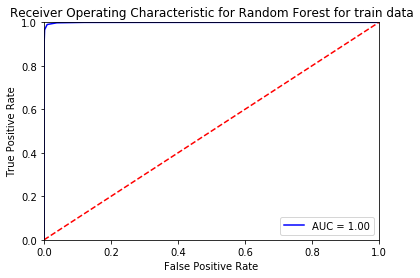

In [38]:
RandomForest=RandomForestClassifier(n_estimators=10)
RandomForest.fit(x_Train, y_Train)
#predict using the testing data
pred=RandomForest.predict(x_Test)
print("RandomForest classifier accuracy for test data : ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for random forest 
print("Confusion matrix for random forest classifier test data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))

pred_Train=gnb.predict(x_Train)
print("RandomForest classifier accuracy on train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of RandomForest classifier train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))



# calcualte probabilty for each test instance
probs = RandomForest.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for RandomForest classifier test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Random Forest for test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = RandomForest.predict_proba(x_Train)
preds_Train = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Train,preds_Train,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for RandomForest classifier train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Random Forest for train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Bagging_Model ensemble accuracy on test data :  0.7565554330761265
Confusion matrix for Bagging_Model for test data
[[12872  2174]
 [ 5114  9777]]
              precision    recall  f1-score   support

          No       0.72      0.86      0.78     15046
         Yes       0.82      0.66      0.73     14891

    accuracy                           0.76     29937
   macro avg       0.77      0.76      0.75     29937
weighted avg       0.77      0.76      0.75     29937

Bagging_Model ensemble accuracy on train Data :  0.9831212151579791
Confusion matrix of Bagging_Model for train Data
[[34777    71]
 [ 1108 33895]]
              precision    recall  f1-score   support

          No       0.97      1.00      0.98     34848
         Yes       1.00      0.97      0.98     35003

    accuracy                           0.98     69851
   macro avg       0.98      0.98      0.98     69851
weighted avg       0.98      0.98      0.98     69851

AUC value for Bagging_Model ensemble train data
0.8

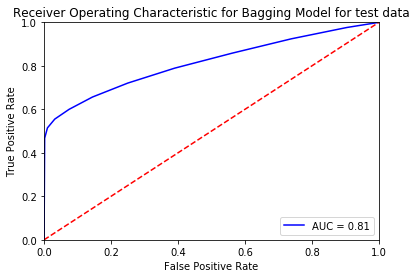

AUC value for Bagging_Model ensemble train data
0.9994281063787606


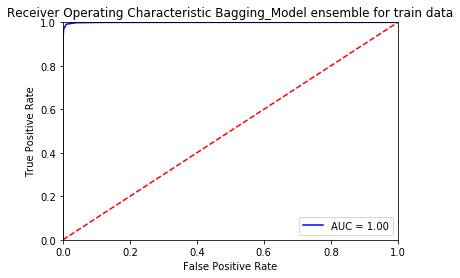

In [39]:
Bagging_Model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
Bagging_Model.fit(x_Train, y_Train)
#predict using the testing data
pred=Bagging_Model.predict(x_Test)
print("Bagging_Model ensemble accuracy on test data : ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for Bagging_Model
print("Confusion matrix for Bagging_Model for test data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))


pred_Train=Bagging_Model.predict(x_Train)
print("Bagging_Model ensemble accuracy on train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of Bagging_Model for train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))



# calcualte probabilty for each test instance
probs = Bagging_Model.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for Bagging_Model ensemble train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Bagging Model for test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = Bagging_Model.predict_proba(x_Train)
preds_Train = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Train,preds_Train,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for Bagging_Model ensemble train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic Bagging_Model ensemble for train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Ada_boosting accuracy  on test data:  0.7450312322544009
Confusion matrix for Ada_boosting on test data
[[13947  1099]
 [ 6534  8357]]
              precision    recall  f1-score   support

          No       0.68      0.93      0.79     15046
         Yes       0.88      0.56      0.69     14891

    accuracy                           0.75     29937
   macro avg       0.78      0.74      0.74     29937
weighted avg       0.78      0.75      0.74     29937

Ada_boosting accuracy on train Data :  0.7423229445534065
Confusion matrix of ADa_Boosting train Data
[[32095  2753]
 [15246 19757]]
              precision    recall  f1-score   support

          No       0.68      0.92      0.78     34848
         Yes       0.88      0.56      0.69     35003

    accuracy                           0.74     69851
   macro avg       0.78      0.74      0.73     69851
weighted avg       0.78      0.74      0.73     69851

AUC value for ADa_boosting classifier for test data
0.8054926925994095


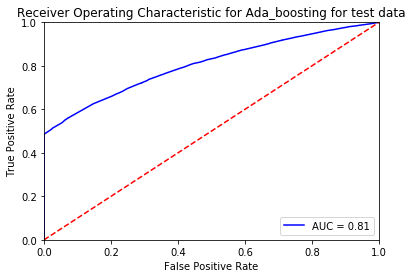

AUC value for ADa_boosting classifier for train data
0.8054926925994095


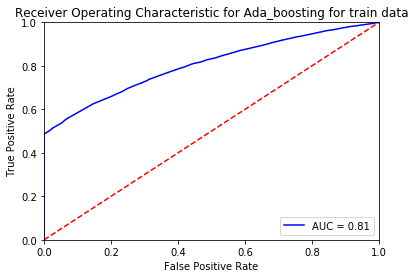

In [40]:
Ada_boosting = AdaBoostClassifier(n_estimators=100)
Ada_boosting.fit(x_Train, y_Train)
#predict using the testing data
pred=Ada_boosting.predict(x_Test)
print("Ada_boosting accuracy  on test data: ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for Bagging_Model
print("Confusion matrix for Ada_boosting on test data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))

pred_Train=Ada_boosting.predict(x_Train)
print("Ada_boosting accuracy on train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of ADa_Boosting train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))


# calcualte probabilty for each test instance
probs = Ada_boosting.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for ADa_boosting classifier for test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Ada_boosting for test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = Ada_boosting.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for ADa_boosting classifier for train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Ada_boosting for train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


XG_Boosting accuracy for test data:  0.7618331830176704
Confusion matrix for XG_Boosting for test data
[[14578   468]
 [ 6662  8229]]
              precision    recall  f1-score   support

          No       0.69      0.97      0.80     15046
         Yes       0.95      0.55      0.70     14891

    accuracy                           0.76     29937
   macro avg       0.82      0.76      0.75     29937
weighted avg       0.82      0.76      0.75     29937

XG_Boostingaccuracy on train Data :  0.7617643269244535
Confusion matrix of XG_Boosting train Data
[[33695  1153]
 [15488 19515]]
              precision    recall  f1-score   support

          No       0.69      0.97      0.80     34848
         Yes       0.94      0.56      0.70     35003

    accuracy                           0.76     69851
   macro avg       0.81      0.76      0.75     69851
weighted avg       0.81      0.76      0.75     69851

AUC value for XGBossting ensemble classifier test data
0.8210412586234217


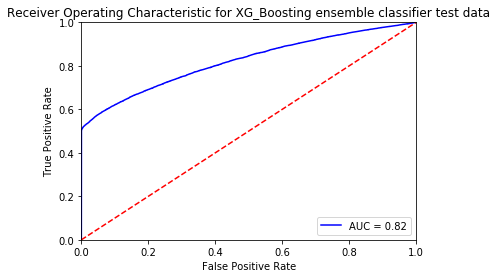

AUC value for XGBossting ensemble classifier train data
0.8274463932705808


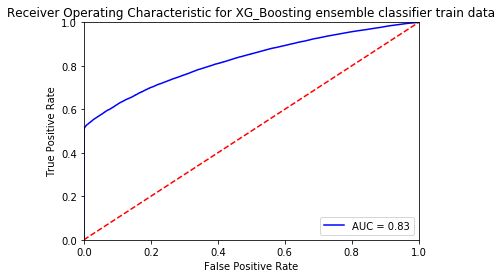

In [41]:
import xgboost
XG_Boosting = xgboost.XGBClassifier()
XG_Boosting.fit(x_Train, y_Train)
#predict using the testing data
pred=XG_Boosting.predict(x_Test)
print("XG_Boosting accuracy for test data: ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for Bagging_Model
print("Confusion matrix for XG_Boosting for test data")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))

pred_Train=XG_Boosting.predict(x_Train)
print("XG_Boostingaccuracy on train Data : ",accuracy_score(y_Train, pred_Train, normalize = True))
# confusion matrix for KNN
print("Confusion matrix of XG_Boosting train Data")
print(confusion_matrix(y_Train, pred_Train))
print(classification_report(y_Train, pred_Train))



# calcualte probabilty for each test instance
probs = XG_Boosting.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC value for XGBossting ensemble classifier test data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for XG_Boosting ensemble classifier test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs =  XG_Boosting.predict_proba(x_Train)
preds_Train = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Train,preds_Train,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)

print("AUC value for XGBossting ensemble classifier train data")
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for XG_Boosting ensemble classifier train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

RuleBased_Clf accuracy :  0.49741123025019207
Confusion matrix for RuleBased_Clf
[[    0 15046]
 [    0 14891]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00     15046
         Yes       0.50      1.00      0.66     14891

    accuracy                           0.50     29937
   macro avg       0.25      0.50      0.33     29937
weighted avg       0.25      0.50      0.33     29937

0.8210412586234217


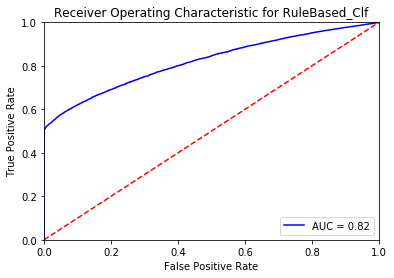

In [42]:
from sklearn.dummy import DummyClassifier
RuleBased_Clf = DummyClassifier(strategy="most_frequent")
RuleBased_Clf.fit(x_Train, y_Train)
#predict using the testing data
pred=RuleBased_Clf.predict(x_Test)
print("RuleBased_Clf accuracy : ",accuracy_score(y_Test, pred, normalize = True))
# confusion matrix for RuleBased_Clf
print("Confusion matrix for RuleBased_Clf")
print(confusion_matrix(y_Test, pred))
print(classification_report(y_Test,pred))



# calcualte probabilty for each test instance
probs = XG_Boosting.predict_proba(x_Test)
preds = probs[:,1]

# calculates the fpr and tpr points to plot roc curve
fpr, tpr, threshold = metrics.roc_curve(y_Test,preds,pos_label='Yes')
# calculates area under the curve
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for RuleBased_Clf')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [43]:
import wittgenstein as lw
from sklearn.metrics import precision_score, recall_score

Train, Test  = train_test_split(NoShow_Finaldata, test_size=.33,random_state=42)

RuleBase =  lw.RIPPER()
RuleBase.fit(Train, class_feat='No-show', pos_class='Yes', random_state = 42)

#pred = RuleBase.predict(Test)
#print(confusion_matrix(Test, pred))
#print(classification_report(Test,pred))

X_test = Test.drop('No-show', axis=1)
y_test = Test['No-show']
# Collect performance metrics
p_value= RuleBase.score(X_test, y_test, precision_score)
r_value = RuleBase.score(X_test, y_test, recall_score)
cond_count = RuleBase.ruleset_.count_conds()
    
print("Precision:") 
print(p_value)
print("Recall:")
print(r_value)
print("Number of conditions in rules:")
print(cond_count)
print("Rules extracted when trained with positive target value")
RuleBase.ruleset_.out_pretty()

Precision:
0.5098039215686274
Recall:
0.007885956930542918
Number of conditions in rules:
7
Rules extracted when trained with positive target value
[[Hipertension=0^Scholarship=1^Alcoholism=1] V
[Hipertension=0^AppointmentID=5565689-5604946^SMS_received=0^Age=42-50]]


In [44]:
import wittgenstein as lw
from sklearn.metrics import precision_score, recall_score

Train, Test  = train_test_split(NoShow_Finaldata, test_size=.33,random_state=42)

RuleBase =  lw.RIPPER()
RuleBase.fit(Train, class_feat='No-show', pos_class='No', random_state = 42)

#pred = RuleBase.predict(Test)
#print(confusion_matrix(Test, pred))
#print(classification_report(Test,pred))

X_test = Test.drop('No-show', axis=1)
y_test = Test['No-show']
# Collect performance metrics
p_value= RuleBase.score(X_test, y_test, precision_score)
r_value = RuleBase.score(X_test, y_test, recall_score)
cond_count = RuleBase.ruleset_.count_conds()
    
print("Precision:") 
print(p_value)
print("Recall:")
print(r_value)
print("Number of conditions in rules:")
print(cond_count)
print("Rules extracted when trained with negative target value")
RuleBase.ruleset_.out_pretty()




Precision:
0.7326732673267327
Recall:
0.43635258358662615
Number of conditions in rules:
2
Rules extracted when trained with negative target value
[[NumberOfDays=0-2] V
[SMS_received=1]]
